In [1]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [2]:
file_path = r'E:\chrome download\paper\corpus\glove.6B\glove.6B.100d.txt'
glove_file = datapath(file_path)
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [3]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [4]:
model.most_similar('obama')

[('barack', 0.9372166395187378),
 ('bush', 0.9272854924201965),
 ('clinton', 0.8960002660751343),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000322580337524),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851963639259338),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472625970840454)]

In [5]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959496736526489),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653991699219)]

In [6]:
model.most_similar('banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887731552124023),
 ('potato', 0.6629635691642761),
 ('pineapple', 0.6534532904624939),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349172592163086),
 ('cashew', 0.6294418573379517),
 ('papaya', 0.6246589422225952)]

In [10]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))
print(result[:3])

queen: 0.7699
[('queen', 0.7698541283607483), ('monarch', 0.684337854385376), ('throne', 0.675573468208313)]


In [11]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [12]:
analogy('japan', 'japanese', 'australia')

'australian'

In [15]:
analogy('health', 'good', 'hello')

'goodbye'

In [16]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [17]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


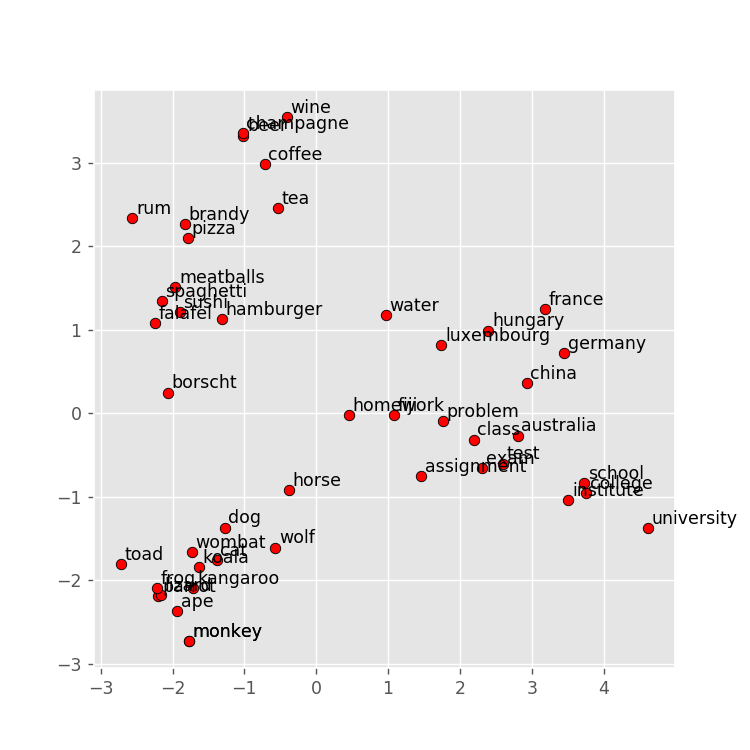

In [19]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>


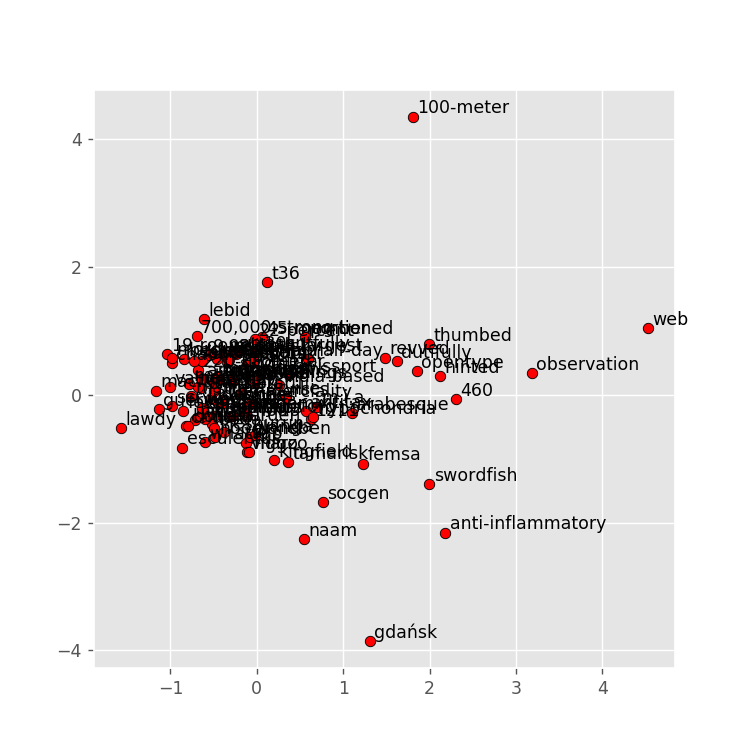

In [21]:
display_pca_scatterplot(model, sample=100)